# 13 Reasons Py
* more details here
* more details here

In [12]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

## Define initial variables

In [2]:
# File path for Substance Abuse & Mental Health Service Facilities (SAMHS)
SAMHS_File = "Resources/MentalHealth_SubstanceAbuse_Facilities.csv"

# File path for FED Crime Data (change the file name as required)
CrimeData_File = "Resources/CrimeData.csv"

# List of States to compare ?
State_list = ["NY","NC","OR","TX","MN"]

## SAMHS Facility Data

In [3]:
# Read SAMHS data to Dataframe
SAMHS_df = pd.read_csv(SAMHS_File)

# Group the data based on State
SAMHS_byState = SAMHS_df.groupby(["state"])

# Get count of Facility for each state, and create a Data frame
SAMHS_StateCount_df = pd.DataFrame({"Facility Count" : SAMHS_byState["name1"].count()})

# Reset the index, to have the state as a column/field
SAMHS_StateCount_df.reset_index(inplace=True)

# Preview dataframe
SAMHS_StateCount_df

,state,Facility Count
0,AK,170
1,AL,260
2,AR,311
3,AS,2
4,AZ,708
5,CA,1862
6,CO,533
7,CT,414
8,DC,52
9,DE,61


In [4]:
# if needed - Filter by State
# SAMHS_df = SAMHS_StateCount_df[SAMHS_StateCount_df.state.isin(State_list)]
SAMHS_df = SAMHS_StateCount_df
# Preview Dataframe
SAMHS_df

,state,Facility Count
0,AK,170
1,AL,260
2,AR,311
3,AS,2
4,AZ,708
5,CA,1862
6,CO,533
7,CT,414
8,DC,52
9,DE,61


## Crime Data

In [5]:
# Read Crime data to Dataframe
CrimeData_df = pd.read_csv(CrimeData_File)
CrimeData_df = CrimeData_df[["state","year","population","total crime"]]
CrimeData_df

,state,year,population,total crime
0,AK,2017,739786,65221.0
1,AL,2017,4875120,339189.0
2,AR,2017,3002997,223368.0
3,AZ,2017,7048876,482481.0
4,CA,2017,39399349,2339968.0
5,CO,2017,5615902,346919.0
6,CT,2017,3573880,144013.0
7,DC,2017,695691,73648.0
8,DE,2017,957078,55752.0
9,FL,2017,20976812,1226817.0


In [6]:
# if needed - Filter by State
# Crime_df = CrimeData_df[CrimeData_df.state.isin(State_list)]
Crime_df = CrimeData_df
Crime_df

,state,year,population,total crime
0,AK,2017,739786,65221.0
1,AL,2017,4875120,339189.0
2,AR,2017,3002997,223368.0
3,AZ,2017,7048876,482481.0
4,CA,2017,39399349,2339968.0
5,CO,2017,5615902,346919.0
6,CT,2017,3573880,144013.0
7,DC,2017,695691,73648.0
8,DE,2017,957078,55752.0
9,FL,2017,20976812,1226817.0


## Combine Facility and Crime Data

In [7]:
# Combine SAMHS Facility Dataframe and Crime Dataframe
Reasons13_df = pd.merge(SAMHS_df, Crime_df, how="inner", on="state")
Reasons13_df

,state,Facility Count,year,population,total crime
0,AK,170,2017,739786,65221.0
1,AL,260,2017,4875120,339189.0
2,AR,311,2017,3002997,223368.0
3,AZ,708,2017,7048876,482481.0
4,CA,1862,2017,39399349,2339968.0
5,CO,533,2017,5615902,346919.0
6,CT,414,2017,3573880,144013.0
7,DC,52,2017,695691,73648.0
8,DE,61,2017,957078,55752.0
9,FL,987,2017,20976812,1226817.0


# Link to Federal report,  showing crime per 100,000 population
[Federal 2017 report](https://www.fbi.gov/news/pressrel/press-releases/fbi-releases-2017-crime-statistics)

In [8]:
# Data Mupulation / conversion

#Facility Count / population, and per 100k, defined earlier per_population = 100,000
Reasons13_df["Facility Count (per 100K)"] = Reasons13_df["Facility Count"] * 100000.0 / Reasons13_df["population"]
Reasons13_df["crime count (per 100K)"] = Reasons13_df["total crime"] * 100000.0 / Reasons13_df["population"]

# preview DF
Reasons13_df.sort_values('Facility Count (per 100K)',ascending=True)

,state,Facility Count,year,population,total crime,Facility Count (per 100K),crime count (per 100K)
43,TX,755,2017,28322717,1697564.0,2.665705,5993.648138
40,SC,194,2017,5021219,372234.0,3.863604,7413.219778
33,NV,122,2017,2972405,190336.0,4.104420,6403.434256
10,GA,482,2017,10413055,670461.0,4.628805,6438.658012
9,FL,987,2017,20976812,1226817.0,4.705195,5848.443510
4,CA,1862,2017,39399349,2339968.0,4.725966,5939.103207
45,VA,438,2017,8465207,341476.0,5.174120,4033.876549
1,AL,260,2017,4875120,339189.0,5.333202,6957.551814
18,LA,275,2017,4670818,367117.0,5.887620,7859.801003
8,DE,61,2017,957078,55752.0,6.373566,5825.230545


## Place for Bar / Line

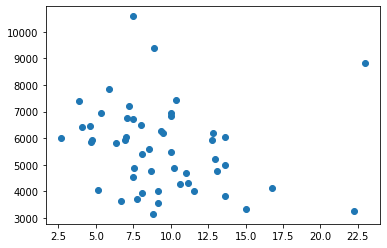

In [9]:
plt.scatter(Reasons13_df["Facility Count (per 100K)"], Reasons13_df["crime count (per 100K)"], marker="o")

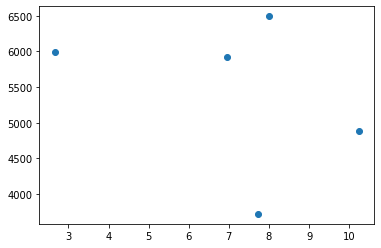

In [10]:
# only for listed states
Reasons13_reduced_df = Reasons13_df[Reasons13_df.state.isin(State_list)]
plt.scatter(Reasons13_reduced_df["Facility Count (per 100K)"], Reasons13_reduced_df["crime count (per 100K)"], marker="o")

## Chart 2

## Chart 3

## Statistical Significance Test

In [13]:
stats.ttest_1samp(Reasons13_reduced_df["Facility Count (per 100K)"], Reasons13_reduced_df["crime count (per 100K)"].mean())

Ttest_1sampResult(statistic=-4353.855495614591, pvalue=1.6697638512638167e-14)